In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
from scipy.signal import find_peaks

In [2]:
peak_energy = [53.1622, 79.6412]

In [3]:
data = np.loadtxt("Ba.txt")
ch = list(range(4096))

peaks = find_peaks(data, prominence=100)

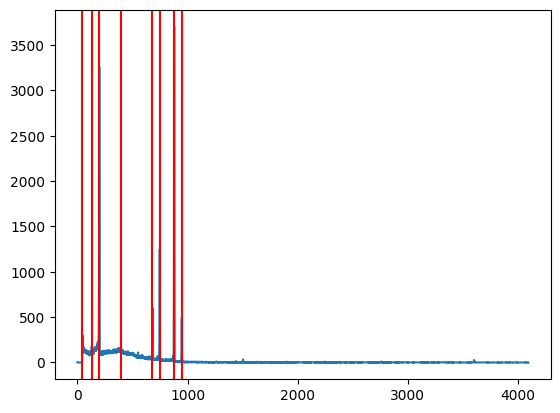

In [4]:
plt.plot(ch,data)
for i in peaks[0]:
    plt.axvline(ch[i], color="Red")
plt.show()